In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **1. EDGAR NC files (Annual gridmpas)**

EDGAR also provides data on C02 emissions on a world map format

Link: https://edgar.jrc.ec.europa.eu/gallery.php?release=v50&substance=CO2_excl_short-cycle_org_C&sector=TOTALS

Notes: Emission gridmaps are expressed in kg substance /m2 /s for the .nc files.

In [4]:
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install netCDF4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (445 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Prepari

In [0]:
import io
import os
import glob
import re
import sys
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits.basemap import Basemap

In [0]:
# On travaille ici sur les données 2018

path_1 = "/content/drive/My Drive/Data For Good/v50_CO2_excl_short-cycle_org_C_2018.0.1x0.1.nc"

In [7]:
dataset = Dataset(path_1, 'r')

print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    title: Annual Mean Emissions of CO2 - 
    institution: European Commission, Joint Research Centre
    source: http://edgar.jrc.ec.europa.eu/
    history: Created from original data (0.1x0.1 degrees) using IDL program (edgar_ascii_to_ncdf.pro) on Mon Oct 28 11:47:50 2019
    references: European Commission, Joint Research Centre (JRC)/Netherlands Environmental Assessment Agency (PBL). Emission Database for Global Atmospheric Research (EDGAR),http://edgar.jrc.ec.europe.eu
    copyright_notice: Reproduction of the data is authorized, except for commercial purposes, provided the source is fully acknowledged in the from"Source: European Commission, Joint Research Centre (JRC)/Netherlands Environmental Assessment Agency (PBL). Emission Databasefor Global Atmospheric Research (EDGAR), http://edgar.jrc.ec.europe.eu". Where reproduction is on a web-site,at least one link

In [8]:
dataset.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  comment: center_of_cell
              unlimited dimensions: 
              current shape = (1800,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  comment: center_of_cell
              unlimited dimensions: 
              current shape = (3600,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('emi_co2', <class 'netCDF4._netCDF4.Variable'>
              float32 emi_co2(lat, lon)
                  standard_name: tendency_of_atmosphere_mass_content_of_carbon_dioxide_due_to_em

In [9]:
dataset.variables.keys()

odict_keys(['lat', 'lon', 'emi_co2'])

## Transform into dataframe

In [0]:
arr_C02 = np.array(dataset.variables['emi_co2'])
arr_lat = np.array(dataset.variables['lat'])
arr_lon = np.array(dataset.variables['lon'])

In [11]:
data_tableau = np.zeros((arr_lat.size*arr_lon.size,3))
data_tableau.shape

(6480000, 3)

In [0]:
for j in range(3600-1): 
  for i in range(1800-1): 
    data_tableau[i+(1800*j),0]=arr_lat[i]
    data_tableau[i+(1800*j),1]=arr_lon[j]
    data_tableau[i+(1800*j),2]=arr_C02[i,j]
    i+1
  j+1

In [13]:
CO2_emissions_Edgar = pd.DataFrame(data_tableau)
CO2_emissions_Edgar.columns = ['latitude', 'longitude', 'CO2 emissions']

def decale(a):
    if (a > 180):
      return a-360
    return a

CO2_emissions_Edgar['longitude'] = CO2_emissions_Edgar['longitude'].apply(decale)

CO2_emissions_Edgar.head()

,latitude,longitude,CO2 emissions
0,-89.949997,0.05,0.0
1,-89.849998,0.05,0.0
2,-89.750000,0.05,0.0
3,-89.650002,0.05,0.0
4,-89.550003,0.05,0.0


In [14]:
CO2_emissions_Edgar.describe()

,latitude,longitude,CO2 emissions
count,6.480000e+06,6.480000e+06,6.480000e+06
mean,-4.995834e-02,1.387778e-05,1.893313e-09
std,5.191101e+01,1.038942e+02,9.225375e-08
min,-8.995000e+01,-1.799500e+02,0.000000e+00
25%,-4.495000e+01,-8.995001e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.485000e+01,8.995000e+01,4.428961e-11
max,8.985000e+01,1.799500e+02,1.208277e-04


## Data visualisation

In [0]:
def draw_map(data, lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
        
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal = matplotlib.colors.LogNorm(vmax=data['CO2 emissions'].max())

    m.scatter(data['longitude'], data['latitude'], c=data['CO2 emissions'], cmap=plt.cm.jet, s=size_point, norm=normal)
    plt.colorbar()

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

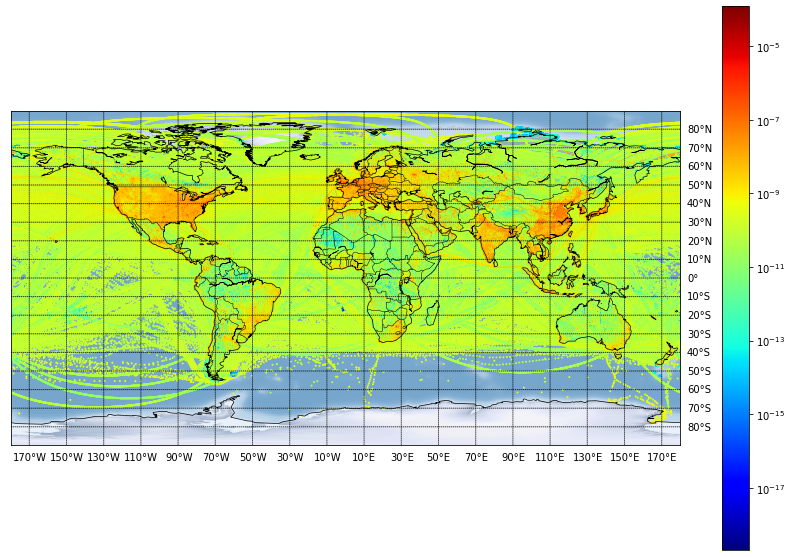

In [16]:
# Visualisation des pics d'émissions

draw_map(CO2_emissions_Edgar, frontier=True)

# 2. Données de pics d'émissions localisées



## 2.1 Données de centrales électriques brûlant des combustibles fossiles et donc libérant de grandes quantités de CO2 dans l'atmosphère

La source est le site suivant: "http://datasets.wri.org/dataset/globalpowerplantdatabase" (taper "dataset wri power plant" et premier lien si le lien ne fonctionne pas).

Les données sont une liste de centrales produisant de l'électricité selon différentes énergies primaires, et nous avons filtré pour ne garder que les énergies primaires fossiles qui émettent du CO2 lors de leur combustion.

Les données indiquent les latitudes et longitudes de ces différentes centrales, ainsi que les GWh d'électricité produite. Il faut alors ajouter des facteurs d'émissions (gCO2/KWh) selon les différents types de centrale.

Comme nous ne considérons que 3 types de centrales ici, alors les facteurs d'émissions de l'ADEME ont été ajoutés avec un autre dataframe (source = " https://www.bilans-ges.ademe.fr/docutheque/docs/Documentation%20g%C3%A9n%C3%A9rale%20anglaise%20v17.0.pdf ", page 111). A noter que ces facteurs d'émissions comprennent l'amont des combustibles (extraction, traitement, raffinage, transport et distrbution), plus la combustion pour produire de l'électricité. La valeur que l'on retournera sera donc plus grande que la valeur réelle car elle comprend une partie amont d'émissions qui n'ont pas eu lieu directement sur le lieu de la centrale générant de l'électricité, et donc du CO2.

Il est également possible de se baser sur la colonne 'capacity_mw' pour évaluer la taille de la centrale, bien que les données en GWh soient à privilégier car indiquant la production réelle d'électricité, et donc la quantité réelle de CO2 émis.


In [17]:
path_2 = "/content/drive/My Drive/Data For Good/global_power_plant_database.csv"
df_source1 = pd.read_csv(path_2, sep=",")
df_source1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1.1 Transform into dataframe

In [18]:
centrale_preparation = df_source1.copy()

# Suppression des colonnes inutiles

centrale_preparation = centrale_preparation.drop(['country','name','commissioning_year', 'owner', 'source','gppd_idnr', 'other_fuel1','other_fuel2','other_fuel3', 'url','geolocation_source', 'wepp_id','year_of_capacity_data'],axis=1)
centrale_preparation.head()

,country_long,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,Afghanistan,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Visualisation des données manquantes

centrale_preparation.count()

country_long                29910
capacity_mw                 29910
latitude                    29910
longitude                   29910
primary_fuel                29910
generation_gwh_2013          6996
generation_gwh_2014          7440
generation_gwh_2015          8144
generation_gwh_2016          8971
generation_gwh_2017          9213
estimated_generation_gwh    21791
dtype: int64

In [20]:
# Pour observer tous les types de centrale

centrale_preparation['primary_fuel'].unique()

array(['Hydro', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal', 'Solar',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Cogeneration', 'Storage'], dtype=object)

In [21]:
# Suppression des centrales hors gaz, pétrole et charbon

Drop_liste = ('Hydro', 'Other', 'Biomass', 'Petcoke','Wind', 'Nuclear', 'Solar', 'Waste', 'Wave and Tidal', 'Geothermal', 'Cogeneration', 'Storage')

for L in Drop_liste:
        IndexFuel = centrale_preparation[(centrale_preparation['primary_fuel'] == L)].index
        centrale_preparation.drop(IndexFuel, inplace = True)

# Vérification qu'il ne reste que les centrales à gaz, pétrole ou charbon 

centrale_preparation['primary_fuel'].unique()

array(['Gas', 'Oil', 'Coal'], dtype=object)

In [0]:
# Création du dataframe pour ajouter les facteurs d'émissions (gCO2/KWh)
# modifiable si besoin (source actuelle = ADEME avec lien en description plus haut)

gCO2_KWh = pd.DataFrame ({'primary_fuel': ['Gas', 'Oil', 'Coal'], 'gCO2/KWh': [443, 778, 1050]})

In [23]:
# Fusion des dataframe

centrale_preparation = centrale_preparation.merge(gCO2_KWh, on='primary_fuel', how='left')
centrale_preparation.head()

,country_long,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,gCO2/KWh
0,Afghanistan,42.0,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,NaN,443
1,Algeria,520.0,35.8665,6.0262,Gas,NaN,NaN,NaN,NaN,NaN,2152.249819,443
2,Algeria,71.0,36.8924,7.7634,Gas,NaN,NaN,NaN,NaN,NaN,293.864879,443
3,Algeria,560.0,36.5988,3.1375,Gas,NaN,NaN,NaN,NaN,NaN,2317.807497,443
4,Algeria,100.0,36.5914,2.9223,Gas,NaN,NaN,NaN,NaN,NaN,413.894196,443


Version sélectionnée des données 

In [0]:
# Création d'une copie de data_preparation

centrale_v2 = centrale_preparation.copy()

In [25]:
# Création de la colonne 'generation_gwh_2017_final' sélectionnant les données non estimées en priorité, et les données estimées sinon

centrale_v2['generation_gwh_2017_final'] = 0

for i in range (centrale_v2.shape[0]):
    if math.isnan(centrale_v2['generation_gwh_2017'].iloc[i]):                
      centrale_v2['generation_gwh_2017_final'].iloc[i] = centrale_v2['estimated_generation_gwh'].iloc[i]
    else:
      centrale_v2['generation_gwh_2017_final'].iloc[i] = centrale_v2['generation_gwh_2017'].iloc[i]

centrale_v2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,country_long,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,gCO2/KWh,generation_gwh_2017_final
0,Afghanistan,42.0,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,NaN,443,NaN
1,Algeria,520.0,35.8665,6.0262,Gas,NaN,NaN,NaN,NaN,NaN,2152.249819,443,2152.249819
2,Algeria,71.0,36.8924,7.7634,Gas,NaN,NaN,NaN,NaN,NaN,293.864879,443,293.864879
3,Algeria,560.0,36.5988,3.1375,Gas,NaN,NaN,NaN,NaN,NaN,2317.807497,443,2317.807497
4,Algeria,100.0,36.5914,2.9223,Gas,NaN,NaN,NaN,NaN,NaN,413.894196,443,413.894196


In [26]:
# Comptage du nombre de données 'generation_gwh_2017_final' manquantes

count = 0

for i in range(centrale_v2.shape[0]):
    if math.isnan(centrale_v2['generation_gwh_2017_final'].iloc[i]):
      count = count +1

print("Il manque des données de production d'électricité en GWh pour", count, "centrales brûlant des combustibles fossiles sur les", centrale_v2.shape[0], "du dataset")

Il manque des données de production d'électricité en GWh pour 162 centrales brûlant des combustibles fossiles sur les 8602 du dataset


In [27]:
# Ajout de la colonne "tCO2 émises" basée sur la colonne 'generation_gwh_2017_final'

centrale_v2['tCO2_émises'] = centrale_v2['generation_gwh_2017_final']*centrale_v2['gCO2/KWh']
centrale_v2.head()

,country_long,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,gCO2/KWh,generation_gwh_2017_final,tCO2_émises
0,Afghanistan,42.0,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,NaN,443,NaN,NaN
1,Algeria,520.0,35.8665,6.0262,Gas,NaN,NaN,NaN,NaN,NaN,2152.249819,443,2152.249819,9.534467e+05
2,Algeria,71.0,36.8924,7.7634,Gas,NaN,NaN,NaN,NaN,NaN,293.864879,443,293.864879,1.301821e+05
3,Algeria,560.0,36.5988,3.1375,Gas,NaN,NaN,NaN,NaN,NaN,2317.807497,443,2317.807497,1.026789e+06
4,Algeria,100.0,36.5914,2.9223,Gas,NaN,NaN,NaN,NaN,NaN,413.894196,443,413.894196,1.833551e+05


### 2.1.2 Visualisation

Uniquement les centrales

In [0]:
# Fonction reprise du script de Quentin (corrigée pour y ajouter la normalisation)

def draw_map2(data, lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
        
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal = matplotlib.colors.LogNorm(vmax=data['tCO2_émises'].max())

    m.scatter(data['longitude'], data['latitude'], c=data['tCO2_émises'], cmap=plt.cm.jet, s=size_point, norm=normal)
    plt.colorbar()

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


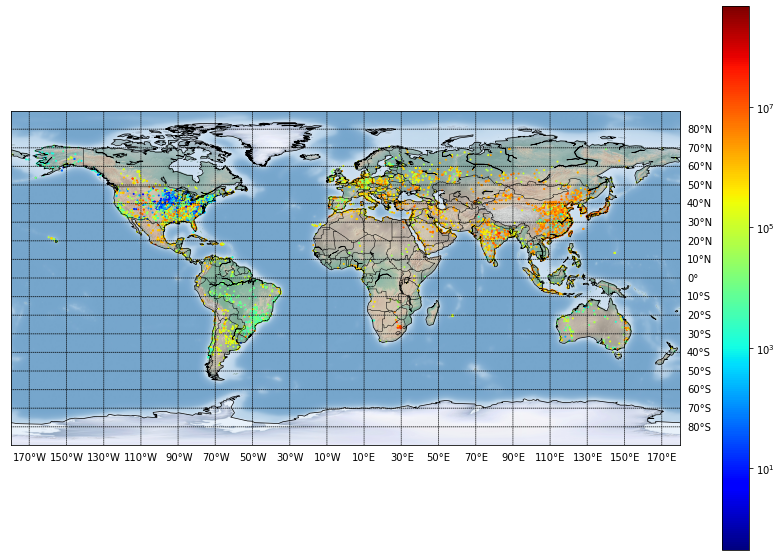

In [29]:
# Visualisation des pics d'émissions 

draw_map2(centrale_v2, frontier=True)

Centrales et données Edgar

In [0]:
# Fonction draw_map avec émissions globales et émissions concentrées par centrales

def draw_map_all(data_first, data_second, lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(30, 20), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
        
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal_first = matplotlib.colors.LogNorm(vmax=data_first['CO2 emissions'].max())
    normal_second = matplotlib.colors.LogNorm(vmax=data_second['tCO2_émises'].max())

    m.scatter(data_first['longitude'], data_first['latitude'], c=data_first['CO2 emissions'], cmap=plt.cm.jet, s=size_point, norm=normal_first)
    plt.colorbar()

    m.scatter(data_second['longitude'], data_second['latitude'], c=data_second['tCO2_émises'], cmap='Greys', s=10*size_point, norm=normal_second)
    plt.colorbar()

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


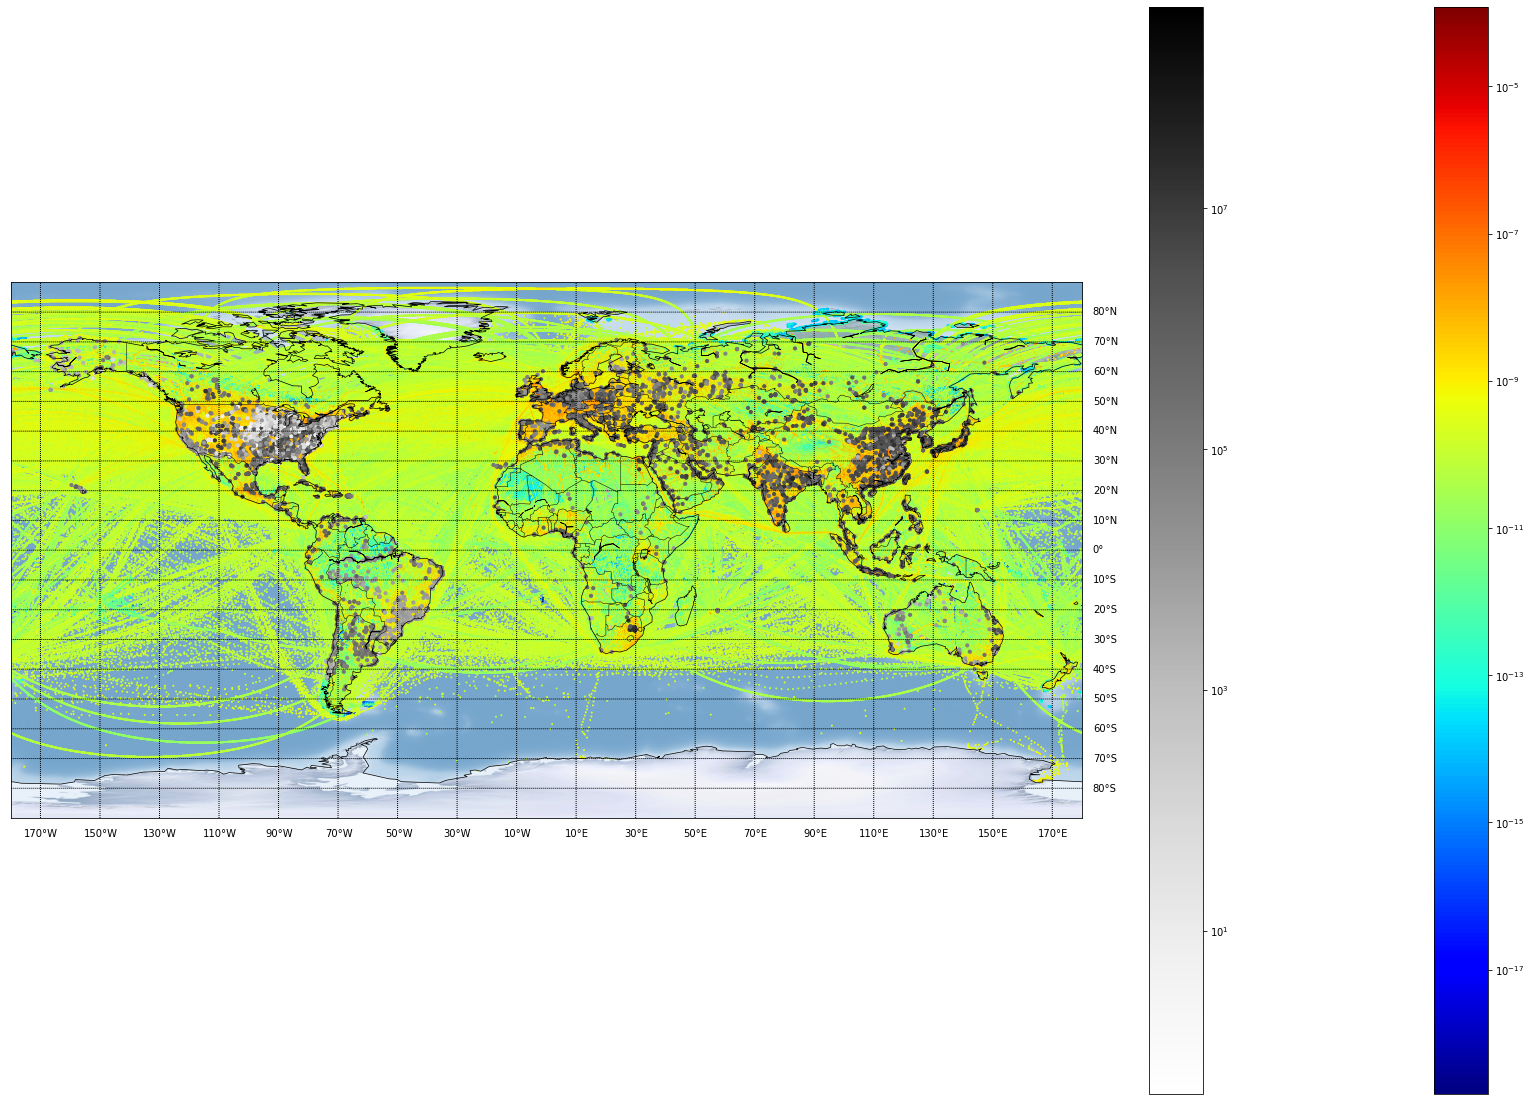

In [33]:
# Visualisation des émissions globales avec ajout des centrales très émettrices de CO2

draw_map_all(CO2_emissions_Edgar, centrale_v2, frontier=True)